In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows", None, "display.max_columns", None) #View entire dataframe

In [54]:
df = pd.read_csv('HistoricRates_BTC(test)')

In [55]:
#df = df.set_index(pd.DatetimeIndex(df['date'].values))
df = df.sort_index()

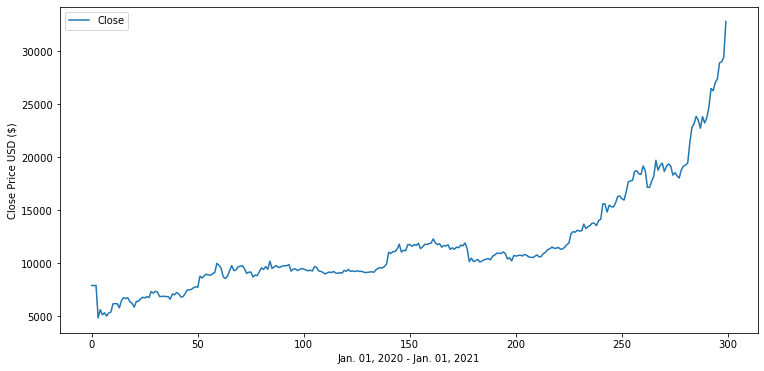

In [56]:
plt.figure(figsize=(12.5, 6))

plt.plot(df['close'], label='Close')
plt.xlabel('Jan. 01, 2020 - Jan. 01, 2021')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [57]:
df['12 Day Avg.'] = df.close.rolling(12).mean()
df['24 Day Avg.'] = df.close.rolling(24).mean()

In [58]:
df.head()

,low,high,open,close,volume,date,12 Day Avg.,24 Day Avg.
0,7630.00,8187.03,8037.73,7934.52,25563.614175,2020-08-03,NaN,NaN
1,7733.56,8158.25,7934.56,7894.68,17172.471301,2020-09-03,NaN,NaN
2,7583.27,7987.97,7894.68,7938.05,13647.865139,2020-10-03,NaN,NaN
3,4644.00,7969.45,7938.05,4857.10,113902.203329,2020-11-03,NaN,NaN
4,3858.00,5995.00,4857.10,5637.60,130316.646844,2020-12-03,NaN,NaN


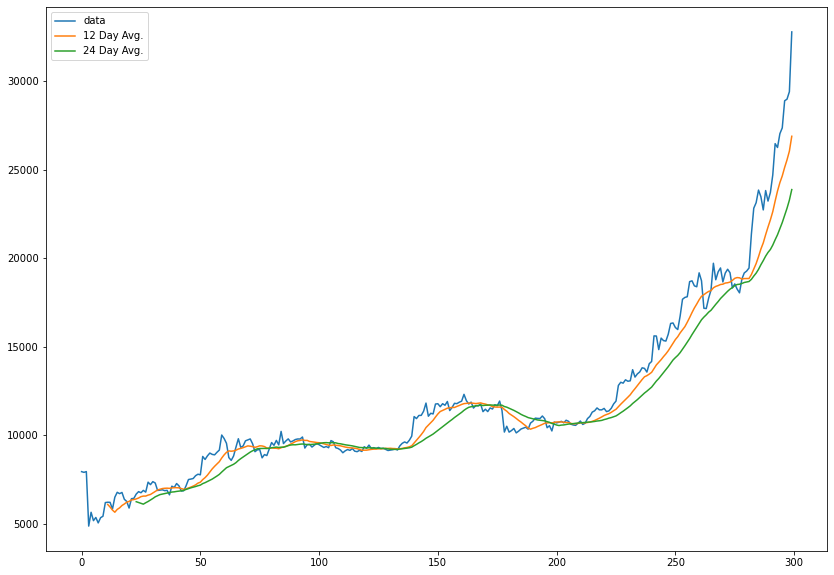

In [59]:
plt.figure(figsize=(14, 10))
plt.plot(df['close'], label='data')
plt.plot(df['12 Day Avg.'], label='12 Day Avg.')
plt.plot(df['24 Day Avg.'], label='24 Day Avg.')
plt.legend(loc='upper left')

plt.show()

In [60]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['12 Day Avg.'][i] > data['24 Day Avg.'][i]:
            if flag != 1:
                sigPriceBuy.append(data['close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['12 Day Avg.'][i] < data['24 Day Avg.'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['close'].iloc[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
                
    return(sigPriceBuy,sigPriceSell)

In [61]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

<function matplotlib.pyplot.show(close=None, block=None)>

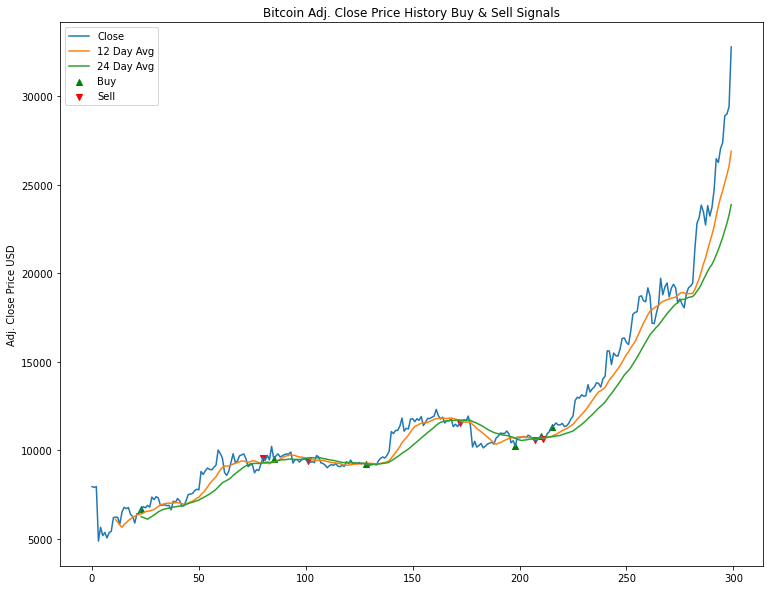

In [63]:
#Visualize data and strategy to buy and sell
plt.figure(figsize=(12.6, 10))
plt.plot(df['close'], label = "Close")
plt.plot(df['12 Day Avg.'], label = "12 Day Avg")
plt.plot(df['24 Day Avg.'], label = "24 Day Avg")
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy',  marker= '^', color = 'green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell', marker= 'v', color = 'red')
plt.title('Bitcoin Adj. Close Price History Buy & Sell Signals')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show